## LAB_9 - Dense Neural Network
### Name: Ramya Chandran
### StudenID: 8895789

#### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points). 


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [5]:
# Load the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Check the number of samples and dimensions
print("Number of training samples:", train_images.shape[0])
print("Number of test samples:", test_images.shape[0])
print("Image dimensions:", train_images.shape[1:])

Number of training samples: 60000
Number of test samples: 10000
Image dimensions: (28, 28)


In [6]:
# Check the number of classes and their corresponding labels
classes = np.unique(train_labels)
print("Classes:", classes)

Classes: [0 1 2 3 4 5 6 7 8 9]


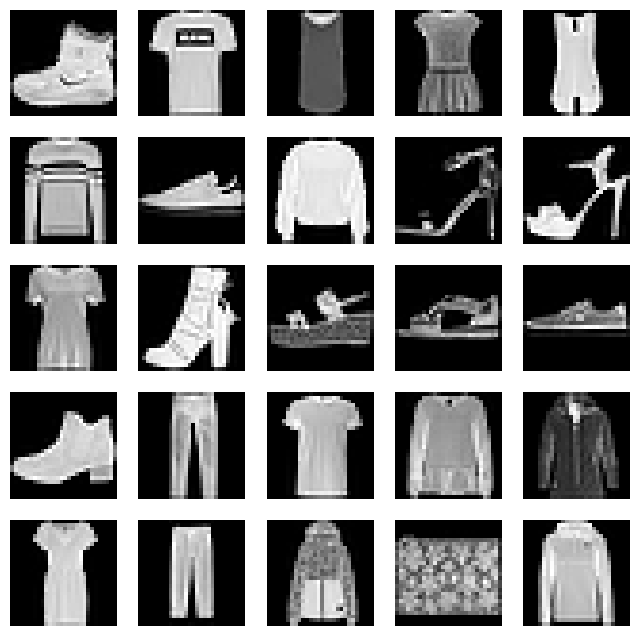

In [7]:
# Plot some sample images from the training set
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

The exploration of the fMNIST dataset provides an initial understanding of its size, class distribution, and visual appearance. It contains grayscale images of various fashion items, and each class is relatively balanced. 

#### 2. Train a dense neural network using Keras (2 points)


In [8]:
# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images for the dense neural network
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

In [9]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
num_epochs = 5
batch_size = 32

model.fit(train_images, train_labels, epochs=num_epochs,
                    batch_size=batch_size, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 9s 4ms/step - loss: 0.4991 - accuracy: 0.8215 - val_loss: 0.3872 - val_accuracy: 0.8597
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8624 - val_loss: 0.3580 - val_accuracy: 0.8705
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.8753 - val_loss: 0.3581 - val_accuracy: 0.8732
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.8832 - val_loss: 0.3543 - val_accuracy: 0.8653
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.8899 - val_loss: 0.3299 - val_accuracy: 0.8797


The activation function used in the hidden layers is ReLU, and for the output layer, we use the softmax activation to obtain class probabilities for multi-class classification.

We compile the model using the Adam optimizer and categorical cross-entropy loss, which is suitable for multi-class classification problems. Finally, we train the model on the training data for 10 epochs with a batch size of 32 and use 10% of the training data for validation during training.

#### 3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [22]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8705
Test accuracy: 0.8705000281333923


In [24]:
# Predict the test set labels
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 2ms/step


Confusion Matrix:
[[740   1  24  67   4   1 151   0  12   0]
 [  0 965   2  23   7   0   2   0   1   0]
 [  8   0 818  12  81   0  77   0   4   0]
 [ 12   9  15 925  14   1  20   0   4   0]
 [  0   0 133  55 759   0  51   0   2   0]
 [  0   0   0   0   0 973   0  10   2  15]
 [ 79   1  96  50  68   0 690   0  16   0]
 [  0   0   0   0   0  48   0 917   1  34]
 [  7   0   4   4   3   6   4   6 966   0]
 [  0   0   0   0   0  12   1  35   0 952]]


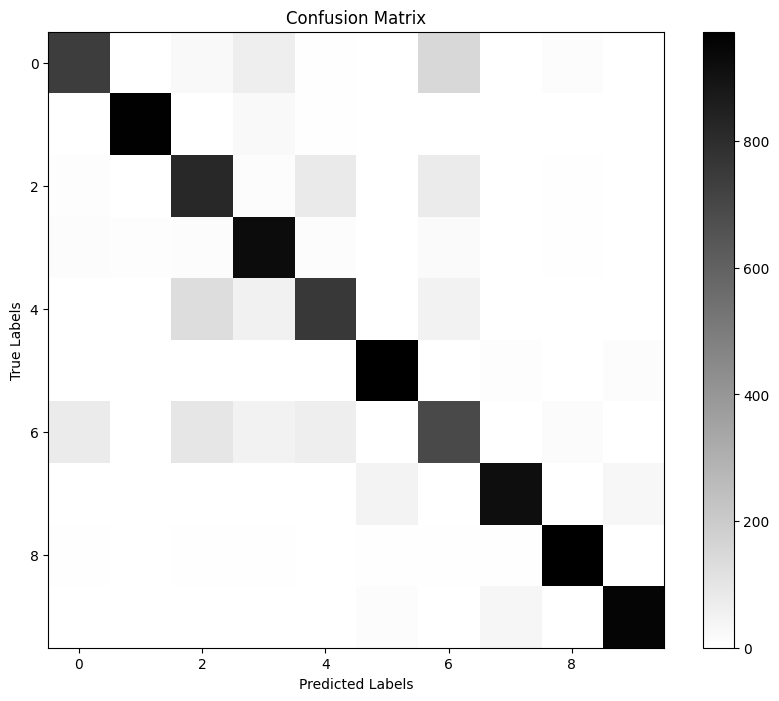

In [29]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap='binary')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Total number of incorrect indices 1295


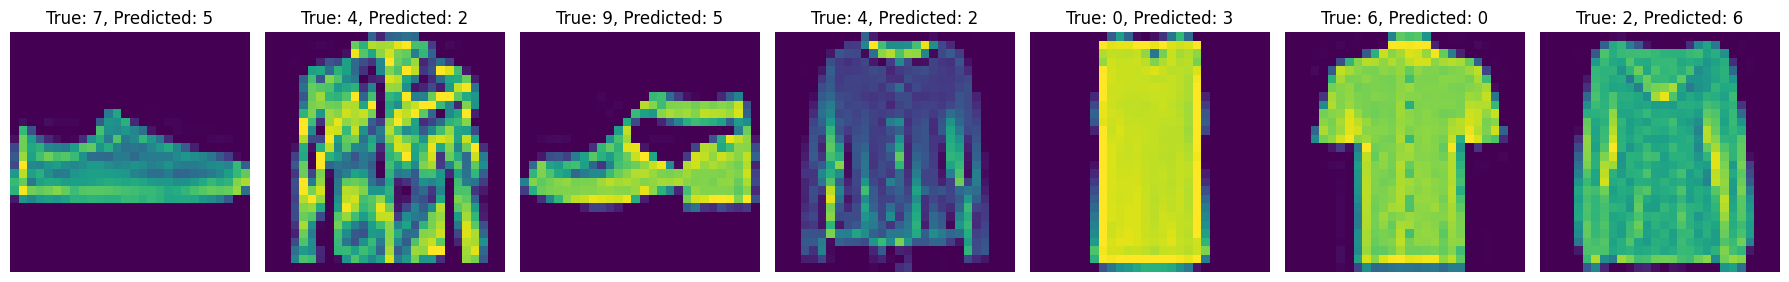

In [33]:
# Explore some examples of incorrect classifications
incorrect_indices = np.where(test_labels != predicted_labels)[0]
print('Total number of incorrect indices',len(incorrect_indices))
num_examples_to_explore = 7
plt.figure(figsize=(18, 7))

for i, idx in enumerate(incorrect_indices[:num_examples_to_explore]):
    plt.subplot(1, num_examples_to_explore, i + 1)
    plt.imshow(test_images[idx].reshape(28,28))
    plt.title(f"True: {test_labels[idx]}, Predicted: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


By exploring examples of incorrect classifications, It reveals cases where certain classes are harder to distinguish due to visual similarities, and it may highlight potential areas of improvement, such as the need for more data or better model architectures.